# Milestone 01

___

## 1. Introduction

Nama    : Yonathan Anggraiwan

Saya adalah seorang data analyst yang bekerja di suatu e-commerce. Pada kesempatan kali ini, pemilik perusahaan meminta kepada saya untuk menganalisa data penjualan tahunan dari toko-toko miliknya. Saya harus menghasilkan kesimpulan analisa yang benar dengan menggunakan perhitungan statistik, serta membuat dashboard visualisasi untuk dipresentasikan kepada para petinggi toko.

Objektif:
Objektif dari proses analisa ini adalah saya perlu mempelajari dataset dengan baik, menganalisanya, dan membuat dashboard interaktif untuk dipresentasikan.

## 2. Import Libraries

In [1]:
import pandas as pd                         # Import package pandas
import scipy as sp                          # Import package scipy
import statistics as stats                  # Import package statistics
import numpy as np                          # Import package numpy
import matplotlib.pyplot as plt             # Import package matplotlib.pyplot
import seaborn as sns                       # Import package seaborn
from scipy import stats                     # Import stats dalam package scipy untuk akses pengolahan statistika
import plotly.express as px                 # Import plotly express untuk package visualisasi plotly

___
## 3. Business Understanding / Problem Statement 

Topik permasalahan:

Topik permasalahan dari proses analisa ini adalah pemilihan metode analisis dan visualisasi data yang tepat. Selain itu, perlu diketahui apakah terdapat korelasi atau hubungan antar kolom atau fitur dari data yang diolah.

SMART Framework:

Spesifik: Mengetahui tren penjualan barang untuk meningkatkan besar penjualan selanjutnya dari departemen store tempat saya bekerja.

Measurable: meningkatkan penjualan toko sebesar 10% dengan mengetahui tren datanya. Dimana metriksnya adalah Customer Loyalty With Retention (metrik yang digunakan untuk melihat bagaimana perusahaan menarik pelanggan, meyakinkan mereka untuk membeli produk atau layanan, dan membuat mereka terus melakukan pembelian. Tujuan utamanya adalah membangun hubungan jangka panjang yang menguntungkan agar penjualan terus meningkat.)

Achievable: Dengan mengetahui tren penjualan barang, maka peningkatan penjualan toko sebesar 10% dapat dicapai.

Relevant: Mengetahui dan mempelajari tren penjualan barang dapat meningkatkan penjualan toko sebesar 10%.

Time-bound: Proses analisa pola tren penjualan barang ini dapat dicapai dalam waktu 6 hari, sedangkan untuk peningkatan penjualan sebesar 10% dapat dicapai dalam waktu 1 tahun dengan perhitungan tahunan.

Dengan menganalisis tren penjualan selama enam hari, saya dapat mengoptimalkan strategi berbasis metriks Customer Loyalty with Retention yang disesuaikan dengan preferensi konsumen perusahaan, sehingga penjualan perusahaan dapat terdorong hingga 10% di tahun berikutnya.


___
## 3. Data Loading

Sumber dataset:

Data yang saya olah, berasal dari situs kaggle.com, dimana data ini dapat diakses dengan [link sebagai berikut ini.](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data)

Data yang sudah didownload, kemudian dicall dengan menggunakan syntax pandas.

In [3]:
df = pd.read_csv("P0M1_Yonathan_Anggraiwan_dataset.csv")
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


Insight:

Data ini adalah data transaksi belanja konsumen, yang mencakup beberapa kolom yang menggambarkan perilaku seorang  konsumen disaat berbelanja. Data ini terdiri dari 14 kolom data kategorik dan 5 kolom data numerik, dimana data ini memiliki 3900 baris didalamnya. 

Berikut ini adalah penjelasan singkat tentang kolom-kolom datanya:

1. Customer ID - ID konsumen,

2. Age - Umur konsumen,

3. Gender - Jenis kelamin konsumen,

4. Item Purchased - Jenis barang yang dibeli (Blouse, sweater, jeans, sandals, dll.),

5. Category - Kategori barang yang dibeli (Clothing, footwear, outerwear, dan accessories.),

6. Purchase Amount (USD) - Besar pembayaran yang dilakukan konsumen dengan mata uang USD,

7. Location - Lokasi konsumen melakukan transaksi,

8. Size - Ukuran barang yang dibeli konsumen (S, M, L, XL.),

9. Color - Warna barang yang dibeli konsumen,

10. Season - Musim waktu konsumen melakukan transaksi,

11. Review Rating - Besar rating yang diberikan oleh konsumen,

12. Subscription Status - Status membership konsumen,

13. Payment Method - Metode pembayaran yang dilakukan konsumen,

14. Discount Applied - Transaksi yang dilakukan konsumen menggunakan fitur diskon / tidak,

15. Promo Code Used - Transaksi yang dilakukan konsumen menggunakan kode promo / tidak,

16. Previous Purchases - Besar pembayaran sebelumnya yang dilakukan oleh konsumen dengan mata uang USD,

17. Preferred Payment Method - Metode pembayaran yang di inginkan konsumen,

18. Frequency of Purchases - Frekuensi pembelian yang dilakukan oleh konsumen.

Data ini memiliki kolom payment method, shipping type, discount applied, previous purchases, preferred payment method, dan frequency of purchases yang menggambarkan perilaku seorang konsumen. 

Akan tetapi setelah dianalisa, kolom yang menggambarkan perilaku seorang konsumen tidak terlalu diperlukan oleh user, karena user lebih ingin tau hubungan tiap kolom / variabel, dan penggambaran datanya seperti apa untuk proses peningkatan penjualan berdasarkan tren belanja.

Setelah dilihat secara kasar, kolom dengan value kolom sudah sesuai dengan yang seharusnya, akan tetapi saya perlu telurusi lebih lanjut dengan data ini.

___
## 4. Data Preprocessing

Saya ingin melihat penjelasan informasi data yang diolah.

In [15]:
df.shape                # Menampilkan dimensi data

(3900, 17)

Data ini terdiri dari 3900 baris data, dan 17 kolom data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Insight:

Tidak terdapat missing value dari keseluruhan data, dan tipe data kolom juga sudah sesuai dengan yang seharusnya, akan tetapi akan dicek kembali dengan syntax pandas.
___

In [ ]:
# Cek missing values
df.isna().sum().sum()

np.int64(0)

Insight:

Benar, tidak terdapat missing value, akan tetapi apakah ada data duplikat? Mari kita mengeceknya dengan menggunakan keyword df.duplicated().sum()

In [8]:
# check data duplikat
df.duplicated().sum()

np.int64(0)

Insight:

Ternyata tidak ada data duplikat. Sejauh ini datanya bisa dikategorikan "bagus" untuk diproses. 

Akan tetapi, terdapat kolom yang valuenya memiliki arti yang sama, yaitu kolom "Discount Applied" dengan "Promo Code Used", dimana kolom "Discount Applied" berisikan data dari konsumen yang mengajukan diskon atau potongan harga disaat berbelanja, yang dimana disaat konsumen mengajukan diskon tersebut, konsumen menggunakan kode promo, sehingga kolom ini dikategorikan sama, dan saya memilih untuk menghapus kolom "Promo Code Used". 
___

In [9]:
df = df.drop(columns=["Promo Code Used"])

Insight:

Kolom data "Promo Code Used" sudah dihapus dari dataset. 

Selanjutnya, karena terdapat banyak kolom yang namanya panjang, maka saya mengubah nama kolomnya supaya tidak terlalu panjang untuk memudahkan proses pengodingan.

Saya juga ingin mengubah kolom customer id menjadi index datasetnya.

In [11]:
df.rename(columns={"Purchase Amount (USD)": "PA",
                   "Preferred Payment Method":"PPM",
                   "Frequency of Purchases":"FOP",
                   "Subscription Status":"SS",
                   "Review Rating":"RR",
                   "Discount Applied":"DA",
                   "Previous Purchases":"PP"}, inplace=True)

df = df.set_index('Customer ID') # Mengubah kolom customer ID menjadi index data
df.head(5)

,Age,Gender,Item Purchased,Category,PA,Location,Size,Color,Season,RR,SS,Payment Method,Shipping Type,DA,PP,PPM,FOP
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


Selanjutnya saya ingin melihat deskripsi datanya menggunakan syntax .describe(), dimana hasil yang keluar adalah nilai mean (rata-rata value), nilai std (standar deviasi), hingga nilai minimum dan maksimum dari kolom-kolom numerik. Informasi yang digali dapat berguna untuk melihat apakah data dari kolom-kolom numerik berdistribusi normal atau tidak, apakah memiliki outlier atau tidak.
___

In [ ]:
df.describe() # ksyntax untuk menampilkan deskripsi data numerik

,Age,PA,RR,PP
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


Insight data:

Dari penjalasan data diatas, maka kita dapatkan insight sebagai berikut:

1. Data Umur (Age)

    Memiliki standar deviasi sebesar 15.20, yang berarti umur dari konsumen sangat bervariasi, dimulai dari umur 18 tahun hingga 70 tahun.

    Rata-rata umur konsumen adalah berumur 44 tahun.

2. Data PA atau Purchase Amount (USD)

    Memiliki standar deviasi sebesar 23.68, yang berarti variasi nilai pembelian barang sangat bervariasi, dengan nilai minimum pembelanjaan adalah $20 dan paling tinggi adlah $100. 

    Rata-rata nilai pembayaran adalah sebesar $59.76.

3. Data RR atau Review Rating

    Memiliki standar deviasi sebesar 0.71, yang artinya memiliki variasi data yang sangat kecil. Namun rata-ratanya terdapat dalam angka 3.75, yang berarti banyak konsumen yang merasa "biasa" sesudah berbelanja. Perusahaan perlu untuk memperhatikan kualitas layanan yang diberikan, kualitas tempat dan barang yang dijual, supaya dapat meningkatkan rating dari konsumen.

    Rata-rata rating adalah sebesar 3.75.

4. Data PP atau Previous Purchases

    Memiliki standar deviasi sebesar 14.44, yang memiliki arti datanya sangat beranekaragam atau sangat bervariasi. Nilai ini dimulai dengan yang terkecil adalah sebesar $1 dan terbesar adalah $50. 

    Rata-rata previous purchases ada di angka $25.35
___

Selanjutnya saya ingin mengecek deskripsi data kategorikal.

In [14]:
df.describe(include='object') # keyword untuk mendeskripsikan data kategorikal

,Gender,Item Purchased,Category,Location,Size,Color,Season,SS,Payment Method,Shipping Type,DA,PPM,FOP
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,677,584


Insight:

1. Data Gender

    Berisikan data gender konsumen, yaitu "Male" dan "Female", dengan data paling banyak adalah gender "Male".

2. Data Item Purchased

    Berisi data tentang jenis barang berdasarkan tipenya. Terdapat 25 jenis barang dengan yang paling banyak terjual adalah yang berjenis "Blouse".

3. Data Category

    Isinya adalah data tipe barangnya, yang terbagi menjadi 4 tipe barang dengan yang paling banyak terjual adalah bertipe "Clothing".

4. Location

    Isinya adalah tempat lokasi toko berada.

5. Size

    Berisikan ukuran barang yang dibeli konsumen.

6. Color

    Merupakan data warna barang yang dibeli konsumen.

7. Season

    Ini adalah kolom tempat data musim waktu transaksi dilakukan.

8. Subscription Status

    Merupakan data status berlangganan konsumen.

9. Payment Method

    Kolom ini berisi data metode pembayaran disaat transaksi dilakukan.

10. Shipping Type

    Kolom yang isinya tentang cara pengiriman barang atau proses pendapatan barang yang dibeli, seperti diambil ditoko (Store Pickup), expres, next day air, dan lain-lain.

11. Discount Applied

    Berisikan data apakah konsumen menggunakan diskon disaat berbelanja atau tidak.

12. Preferred Payment Method

    Berisikan data tentang preferensi konsumen dalam membayar belanjaannya.

13. Frequency of Purchases

    Isi dari kolom ini adalah frenkuensi seseorang dalam berbelanja, apakah semingu sekali, satu tahun sekali, dan lain-lain.

Insight seperti ini belum cukup menggambarkan data, maka perlu dihitung besar varians, skewness, dan kurtosis dari datanya. Bagian pengecekan ini akan dilakukan pada sesi EDA nomor 11.

___
## 5. Exploratory Data Analysis (EDA)

Dalam EDA, terdapat beberapa hal yang perlu untuk saya analisa, yaitu:

1. Gender apa yang paling sering berbelanja?

2. Kategori barang apa yang paling laku terjual?

3. Berapa jumlah besar transaksi dari masing-masing kategori barang?

4. Ukuran barang apa yang paling laku terjual?

5. Apakah lebih banyak konsumen yang berlangganan dibanding tidak berlangganan?

6. Berapa jumlah besar transaksi konsumen yang berlangganan dibanding dengan yang tidak berlangganan?

7. Apakah lebih banyak konsumen yang menggunakan diskon?

8. Apakah jumlah besar transaksi dengan diskon jumlahnya lebih banyak dibandingkan dengan yang tidak diskon?

9. Musim apa yang memiliki jumlah besar transaksi terbesar?

10. Berapa dan apa perhitungan dari statistik deskriptif data ini?

11. Bagaimana hubungan dari keseluruhan variabel data?
___

### 5.1 EDA 1. Gender Apa yang Paling Sering Berbelanja?

Masuk ke EDA nomor 1, yaitu gender apa yang paling sering berbelanja. Meskipun sudah dijelaskan dalam koding sebelumnya, saya tetap perlu menampilkan hasilnya dengan visualisasi data yang jelas.

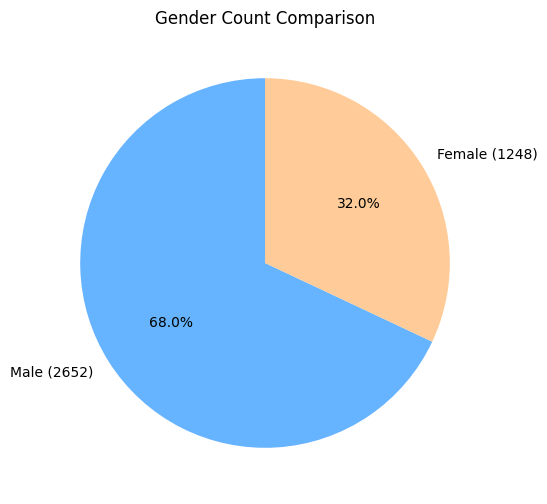

In [27]:
gender_counts = df["Gender"].value_counts()

# Membuat label dengan count gender
labels = [f"{gender} ({count})" for gender, count in zip(gender_counts.index, gender_counts.values)]

# Membuat pie chart
plt.figure(figsize=(6, 6))  # Ukuran grafik agar lebih proporsional
plt.pie(gender_counts, labels=labels, autopct="%.1f%%", colors=["#66b3ff", "#ffcc99"], startangle=90)

# Menambahkan judul
plt.title("Gender Count Comparison")
plt.show()

Insight:

Gender yang paling sering berbelanja adalah "Male" atau laki-laki dengan jumlah persentase sebanyak 68%. Ini merupakan perbandingan data gender yang sangat besar perbedaannya terhadap gender "Female". Ini bisa terjadi karena memang produk yang dimiliki lebih condong kearah laki-laki atau toko dianggap sebagai toko barang laki-laki.

Solusi:

Solusi untuk kejadian ini adalah tetap mempertahankan flow barang untuk gender "Male", serta meningkatkan jumlah barang untuk gender "Female" dengan mempertimbangkan "merk" yang sedang hype atau sedang tren dipasaran saat ini, sehingga jumlah konsumen akan meningkat dan jumlah penjualan akan bertambah.
___

### 5.2 Kategori Barang Apa yang Paling Laku Terjual?

Pertanyaan kedua oleh user adalah kategori barang apa yang paling laku terjual ditoko, untuk menjelaskan data ini, maka perlu dilakukan visualisasi data dengan menjumlahkan total transaksi dari data.

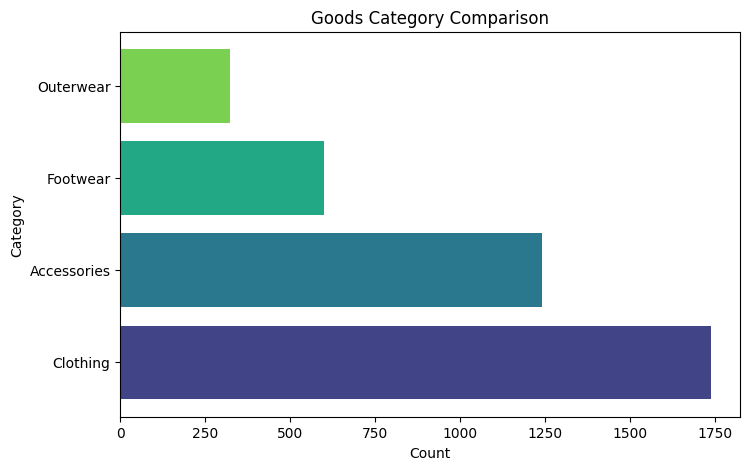

In [19]:
# Menghitung jumlah kategori
category_counts = df["Category"].value_counts()

# Membuat histogram horizontal dengan palet yang lebih menarik
plt.figure(figsize=(8, 5))
colors = sns.color_palette("viridis", len(category_counts))  # Gunakan palet warna
plt.barh(category_counts.index, category_counts.values, color=colors)

# Menambahkan label
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Goods Category Comparison")

# Menampilkan grafik
plt.show()


Insight:

Barang yang paling banyak terjual adalah "clothing" atau pakaian, diikuti dengan asesoris tubuh, yang meninggalkan barang "footwear" dan "outerwear". 

Solusi:

Solusi untuk data ini adalah menambahkan diskon atau memberikan diskon untuk barang berjenis "footwear" dan "outerwear" sehingga dapat terjual walaupun memiliki keuntungan yang lebih sedikit. Untuk barang yang lainnya, dapat ditambah stocknya sesuai kebutuhan atau permintaan pasar dan perkembangan gaya busana.
___

### 5.3 Berapa Jumlah Besar Transaksi Dari Setiap Kategori Barang?

Pertanyaan ketiga oleh user, adalah berapa jumlah besar transaksi yang dilakukan untuk semua jenis kategori barangnya. Disini dilakukan visualisasi data dari jumlah "Purchase Amount" dengan kolom kategori barangnya.

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_7088\1992406322.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="PA", data=cat_pa, palette="viridis")


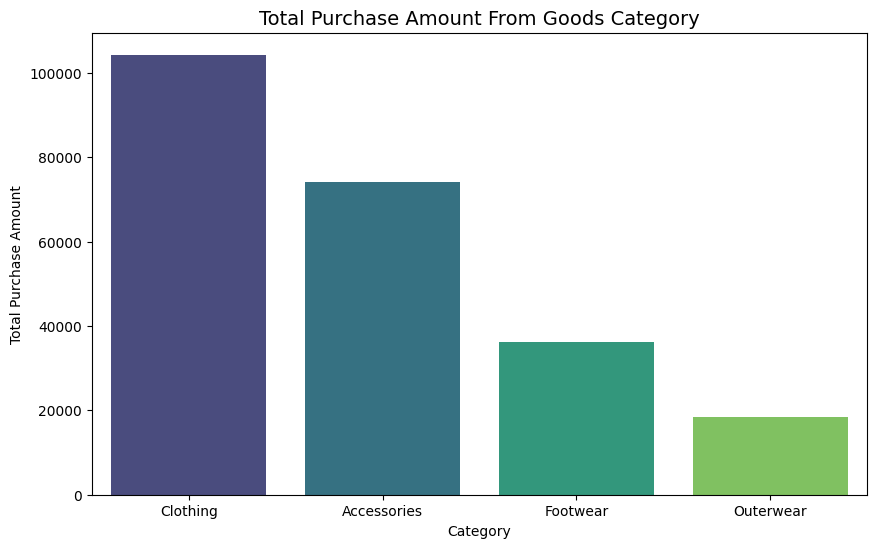

In [25]:
# Menghitung jumlah purchase amount per kategori
cat_pa = df.groupby("Category")["PA"].sum().reset_index().sort_values(by="PA", ascending=False)

# Membuat bar chart dengan Seaborn
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik
sns.barplot(x="Category", y="PA", data=cat_pa, palette="viridis")

# Menambahkan label sumbu'
plt.xlabel("Category")
plt.ylabel("Total Purchase Amount")
plt.title("Total Purchase Amount From Goods Category", fontsize=14, loc="center")

# Menampilkan grafik
plt.show()

Insight:

Kategori barang yang memiliki jumlah besar transaksi adalah "Clothing". Ini terjadi karena memang barang dengan kategori "Clothing" adalah barang yang paling laris, dan barang berkategori "Outerwear" yang paling tidak laris.

Solusi:

Solusi untuk data ini adalah menambahkan diskon atau memberikan diskon untuk barang berjenis "footwear" dan "outerwear" sehingga dapat terjual walaupun memiliki keuntungan yang lebih sedikit. Untuk barang yang lainnya, dapat ditambah stocknya sesuai kebutuhan atau permintaan pasar dan perkembangan gaya busana.
___

### 5.4 Ukuran Barang Apa yang Paling Laku Terjual?

Pertanyaan ke 4 oleh user adalah barang berukuran apa yang paling laku terjual. Ini bisa divisualisasikan dengan menjumlahkan total data dalam kolom "Size".

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_7088\2357347636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_df, x='Size', y='Count', palette='viridis')


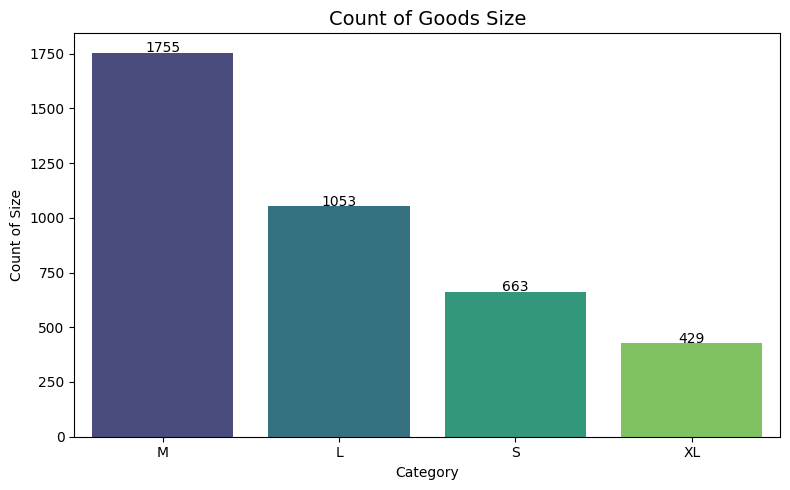

In [23]:
# Menyiapkan data sebagai DataFrame baru untuk seaborn
size_df = size_counts.reset_index()
size_df.columns = ['Size', 'Count']

# Membuat plot bar dengan seaborn dan colormap viridis
plt.figure(figsize=(8, 5))
sns.barplot(data=size_df, x='Size', y='Count', palette='viridis')

# Menambahkan label sumbu dan judul
plt.xlabel("Category")
plt.ylabel("Count of Size")
plt.title("Count of Goods Size", fontsize=14, loc="center")

# Menampilkan nilai pada setiap bar
for i, v in enumerate(size_df['Count']):
    plt.text(i, v + 1, str(v), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

Insight:

Penjualan barang terbanyak adalah dengan ukuran "M", sedangkan yang paling sedikit adalah "XL".

Solusi:

Dari grafik ini, maka dapat diambil solusi adalah dengan menambahkan stock barang yang berukuran "M", dan mengurangi jumlah penambahan stock barang ukuran "S" dan "XL" karena tidak terlalu laku terjual.
___

### 5.5 Apakah Lebih Banyak Konsumen yang Berlangganan Dibanding Tidak Berlangganan?

Toko memiliki fitur berlangganan untuk konsumen, sehingga perlu diketahui juga apakah lebih banyak konsumen yang berlangganan yang berbelanja di toko.

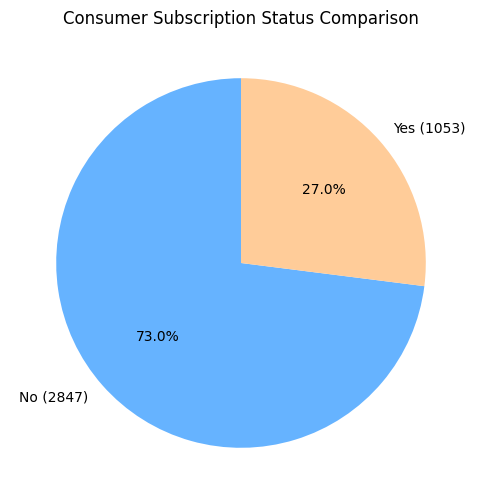

In [32]:
# Menghitung jumlah konsumen yang berlangganan
ss_counts = df["SS"].value_counts()

# Membuat label dengan jumlah konsumen yang berlangganan
labels = [f"{ss} ({count})" for ss, count in zip(ss_counts.index, ss_counts.values)]

# Warna yang lebih variatif
colors = ["#66b3ff", "#ffcc99"]  # Variasi warna yang lebih mencolok

# Membuat pie chart dengan warna baru
plt.figure(figsize=(6, 6))  # Ukuran grafik agar lebih proporsional
plt.pie(ss_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)

# Menambahkan judul
plt.title("Consumer Subscription Status Comparison")
plt.show()

Insight:

Ternyata lebih banyak transaksi dari konsumen yang tidak berlangganan membership toko, akan tetapi jumlah konsumen yang berlangganan juga tidak sedikit, yaitu sebesar 27%.

Solusi:

Fitur berlangganan membership ini perlu dipertahankan, juga perlu untuk dibuat lebih "menarik" dan lebih "worth it" untuk konsumen lihat, sehingga konsumen dapat lebih tertarik untuk mendaftarkan membership di toko.
___

### 5.6 Berapa Jumlah Besar Transaksi Konsumen yang Berlangganan Dibanding Dengan yang Tidak Berlangganan?

Apakah besar transaksi konsumen yang berlangganan lebih besar dibanding yang bukan? Ini adalah pertanyaan ke 6 dari user terhadap analisa datanya. Visualisasi ini dapat ditampilkan dengan menghitung jumlah besar transaksi dengan data subscription status.

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_7088\3637748956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SS", y="PA", data=ss_pa, palette="viridis")


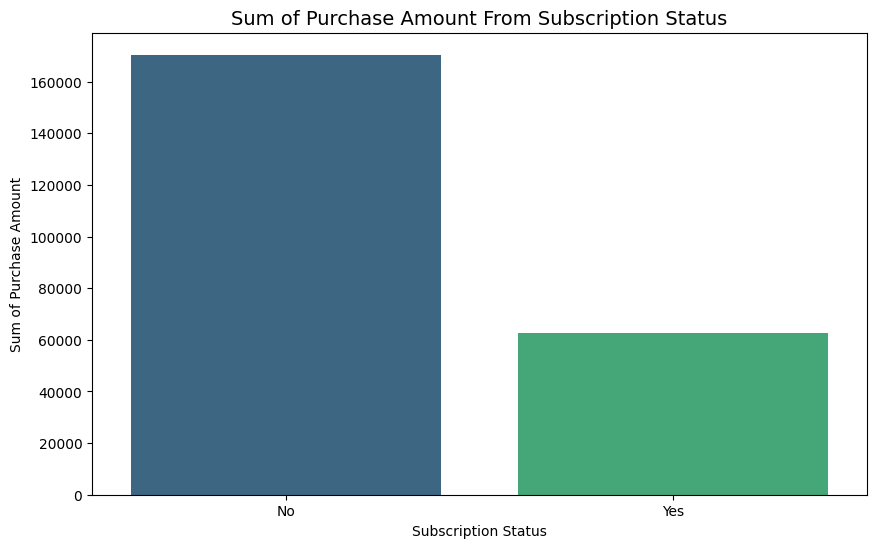

In [34]:
# Menghitung jumlah purchase amount per Subscription Status
ss_pa = df.groupby("SS")["PA"].sum().reset_index().sort_values(by="PA", ascending=False)

# Membuat bar chart dengan Seaborn
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik
sns.barplot(x="SS", y="PA", data=ss_pa, palette="viridis")

# Menambahkan label sumbu'
plt.xlabel("Subscription Status")
plt.ylabel("Sum of Purchase Amount")
plt.title("Sum of Purchase Amount From Subscription Status", fontsize=14, loc="center")
 

# Menampilkan grafik
plt.show()

Insight:

Karena memang jumlah transaksi banyak dilakukan oleh konsumen yang tidak berlangganan, maka jumlah besar transaksinya juga sangat berbeda.

Solusi:

Sama seperti sebelumnya, fitur berlangganan membership ini tetap perlu dipertahankan, juga perlu untuk dibuat lebih "menarik" dan lebih "worth it" untuk konsumen lihat, sehingga konsumen dapat lebih tertarik untuk mendaftarkan membership di toko.
___

### 5.7 Apakah Lebih Banyak Konsumen yang Menggunakan Diskon?

Salah satu pertanyaan user adalah apakah lebih banyak konsumen yang menggunakan diskon? Karena konsumen lebih cenderung merasa "tidak mau rugi" disaat berbelanja, sehingga sepertinya data ini terdiri dari konsumen yang menggunakan diskon.

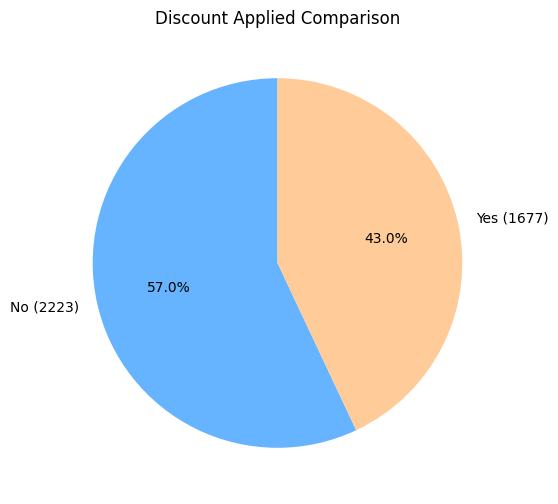

In [35]:
# Menghitung jumlah penggunaan discount dengan counts
da_counts = df["DA"].value_counts()

# Membuat label dengan jumlah penggunaan discount
labels = [f"{da} ({count})" for da, count in zip(da_counts.index, da_counts.values)]

# Warna yang lebih variatif
colors = ["#66b3ff", "#ffcc99"]   # Variasi warna yang lebih mencolok

# Membuat pie chart dengan warna baru
plt.figure(figsize=(6, 6))  # Ukuran grafik agar lebih proporsional
plt.pie(da_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)

# Menambahkan judul
plt.title("Discount Applied Comparison")
plt.show()

Insight:

Ternyata lebih banyak transaksi dengan tidak menggunakan diskon.

Solusi:

Perusahaan tetap perlu berhati-hati dalam pemberian diskon barang, karena jika dihitung dari jumlah lakunya barang, barang dengan jenis "footwear" dan "outerwear" tidak terlalu laku. Sehingga akan lebih bijak jika memberikan diskon kepada 2 jenis kategori barang ini saja.
___

### 5.8 Apakah Jumlah Besar Transaksi Dengan Diskon Jumlahnya Lebih Banyak Dibandingkan Dengan yang Tidak Diskon?

Dipikiran kita disaat memikirkan tentang diskon, maka yang terlintas adalah konsumen yang akan banyak berbelanja "jika" terdapat diskon. Maka seharusnya seorang konsumen akan lebih "menghabiskan" uangnya jika ada diskon yang diberikan. Akan tetapi, pertanyaan dari user ini tetap perlu untuk divisualisasikan dengan baik. Visualisasi data ini dilakukan dengan menjumlahkan total besar transaksi dengan kolom "Discount Applied"

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_7088\1726933293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=da_pa, x="DA", y="PA", palette="viridis")


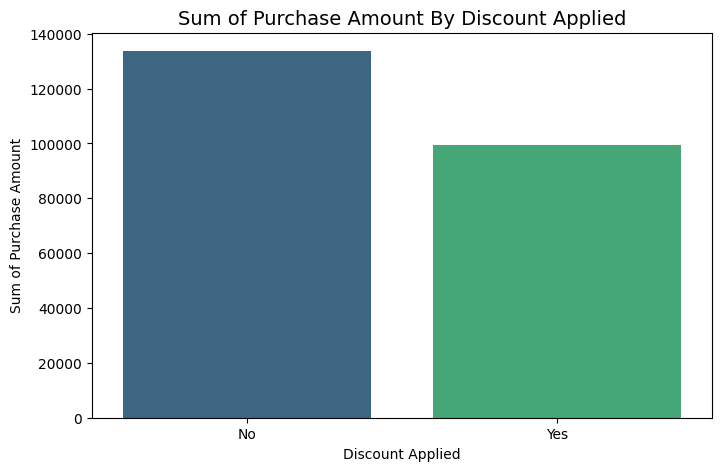

In [37]:
# Menghitung jumlah total transaksi berdasarkan penggunaan diskon
da_pa = df.groupby("DA")["PA"].sum().reset_index()

# Membuat barplot dengan Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=da_pa, x="DA", y="PA", palette="viridis")

# Menambahkan judul dan menyesuaikan tampilan
plt.title("Sum of Purchase Amount By Discount Applied", fontsize=14)
plt.xlabel("Discount Applied")
plt.ylabel("Sum of Purchase Amount")
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()


Insight:

Ternyata yang lebih memiliki jumlah besar transaksi adalah yang tanpa diskon. Akan tetapi nilainya tidak terlalu jauh berbeda dengan yang ada diskonnya.

Solusi:

Untuk kedepannya, perusahaan tetap harus menambahkan diskon kepada barang-barang yang dijual, karena tidak semua orang itu tidak butuh dengan potongan harga. Kita perlu tau juga bahwa terdapat konsumen yang akan merasa "terbantu" jika terdapat diskon dalam proses belanjanya.
___

### 5.9 Musim Apa yang Memiliki Jumlah Besar Transaksi Terbesar?

Musim apa yang paling banyak besar transaksinya? Ini adalah pertanyaan yang penting bagi user untuk mengetahui tren penjualan barang berdasarkan musim. Visualisasinya dilakukan dengan menjumlahkan besar transaksi berdasarkan musim waktu transaksi dilakukan.

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_7088\2101277328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_pa, x="Season", y="PA", palette="viridis")  # Ganti "pastel" dengan palet lain jika ingin variasi warna


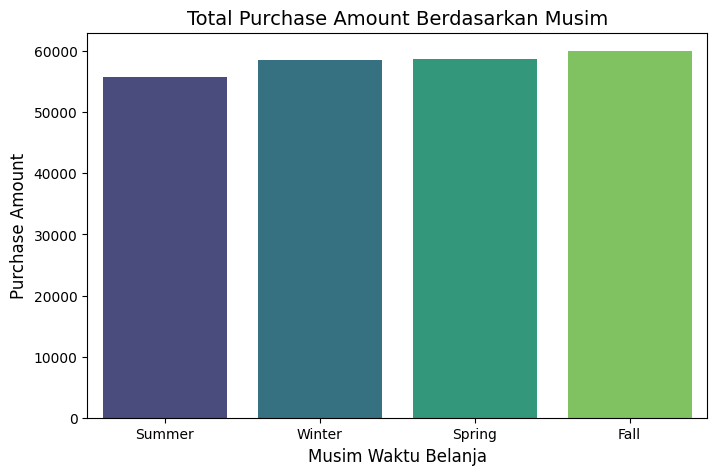

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan dan menjumlahkan PA berdasarkan Season atau musim
season_pa = df.groupby("Season")["PA"].sum().reset_index().sort_values(by="PA", ascending=True)

# Membuat histogram dengan warna berbeda untuk setiap kategori
plt.figure(figsize=(8, 5))
sns.barplot(data=season_pa, x="Season", y="PA", palette="viridis")  # Ganti "pastel" dengan palet lain jika ingin variasi warna

# Menambahkan judul dan label
plt.title("Total Purchase Amount Berdasarkan Musim", fontsize=14, loc="center")
plt.xlabel("Musim Waktu Belanja", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)

# Menampilkan grafik
plt.show()

Insight:

Musim yang memiliki jumlah besar transaksi terkecil adalah musim "Summer", lalu naik di musim "Winter", "Spring", dan yang tertinggi adalah musim "Fall". 

Solusi:

Perbedaan besar transaksi ada diangka yang lumayan, yaitu 1-4 ribu dollar permusim, sehingga perusahaan dapat mempertimbangkan dalam pemberian diskon atau penekanan fitur membership di setiap musimnya, sehingga konsumen memiliki keinginan lebih untuk berbelanja di musim yang berbeda.
___

### 5.10 Bagaimana Persebaran Data Penjualan Dari Setiap Lokasi Toko?

User ingin tau visualisasi persebaran data penjualannya berdasarkan lokasi setiap toko berada, maka saya gunakan choropleth plotly.

In [39]:
# GeoJSON untuk wilayah (sesuaikan dengan data sebenarnya)
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

# Mengelompokkan dan menjumlahkan PA berdasarkan lokasi
location_pa = df.groupby("Location")["PA"].sum().reset_index()

# Plot choropleth dengan jumlah dari PA
fig = px.choropleth(location_pa, 
                    geojson=geojson_url,
                    locations="Location", 
                    featureidkey="properties.name",
                    color="PA",
                    color_continuous_scale="Reds")

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title="Choropleth Map with Plotly - Sum of Purchase Amount",
                  title_x = 0.5)

fig.show()

Insight:

Warna tergelap merupakan lokasi toko dengan penjualan tersebar, yaitu Montana, Idaho, Nevada, California, dan Illinois.

### 5.11 Berapa dan apa perhitungan dari statistik deskriptif data ini?

#### Analisis Data dari Perhitungan Mean, Median, Standar Deviasi, Skewness dan Kurtosis
Setelah datanya bersih, maka saya perlu menganalisa lebih dalam lagi tentang data ini. Dimana saya perlu mencari nilai rata-rata, median, standar deviasi, sampai skewnes dalam data numerik, yang diharapkan adalah semoga data yang didapatkan dapat dikategorikan sebagai data yang bagus dan bebas dari outlier data.

Varians, standar deviasi, skewness, dan kurtosis adalah nilai statistik yang membantu memahami distribusi data. Berikut perbedaannya:
1. Varians mengukur seberapa jauh data tersebar dari rata-rata. Nilai tinggi menunjukkan data lebih tersebar, sedangkan nilai rendah berarti data lebih terkonsentrasi di sekitar rata-rata.
* Varians kecil (<1 atau mendekati 0) → Data tidak terlalu tersebar, hampir semua nilai berada dekat dengan rata-rata.
* Varians sedang (1–10) → Ada sedikit variasi, tetapi penyebarannya masih dalam batas yang wajar.
* Varians tinggi (>10) → Data sangat tersebar, ada nilai yang jauh dari rata-rata.


2. Standar deviasi adalah akar kuadrat dari varians. Ini memberikan ukuran penyebaran yang lebih mudah dipahami karena berada dalam satuan yang sama dengan data aslinya.
* Kecil (<1 atau dekat 0) → Data tidak terlalu tersebar, cenderung terkumpul di sekitar rata-rata.
* Sedang (1–3) → Ada variasi dalam data, tapi masih relatif terkendali.
* Tinggi (>3) → Data sangat tersebar, ada nilai yang jauh dari rata-rata.


3. Skewness menunjukkan apakah distribusi data miring ke kanan atau kiri. Skewness positif berarti ekor distribusi lebih panjang di sisi kanan (data lebih terkonsentrasi di sebelah kiri), sedangkan skewness negatif menunjukkan ekor lebih panjang di sisi kiri.
* Sekitar 0 → Distribusi hampir simetris (mirip normal).
* Positif (>0.5) → Distribusi miring ke kanan (lebih banyak nilai kecil).
* Negatif (<-0.5) → Distribusi miring ke kiri (lebih banyak nilai besar).


4. Kurtosis menggambarkan "kecuraman" distribusi. Nilai tinggi menunjukkan puncak tajam dengan ekor panjang (lebih banyak outlier), sementara nilai rendah menunjukkan distribusi lebih rata.
* Sekitar 3 → Mirip dengan distribusi normal (mesokurtik).
* Kurang dari 3 (platykurtic) → Distribusi lebih datar, sedikit outlier.\
* Lebih dari 3 (leptokurtic) → Distribusi lebih tajam, banyak outlier.

5. P-value dalam distribusi data, menggambarkan apakah datanya sangat tersebar atau tidak. Jika nilai p-value lebih dari 0.05, maka kita tidak menolak hipotesis nol (H₀), yang berarti data tidak berbeda secara signifikan dari distribusi normal.
Dengan kata lain, jika p-value > 0.05, maka kita bisa mengasumsikan bahwa data mengikuti distribusi normal dan tidak ada perbedaan mencolok dibandingkan distribusi yang diharapkan.
Sebaliknya, jika p-value ≤ 0.05, kita menolak hipotesis nol, dan menyimpulkan bahwa data tidak terdistribusi normal


In [23]:
print(f'Nilai varians kolom umur adalah {df["Age"].var().__round__(2)}')         # Perhitungan nilai standar deviasi kolom umur
print(f'Nilai skewnes kolom umur adalah {df["Age"].skew().__round__(3)}')        # Perhitungan nilai skewnes atau kemiringan kolom umur
print(f"Nilai kurtosis kolom umur adalah {df["Age"].kurtosis().__round__(2)}")   # Perhitungan nilai kurtosis kolom umur
res = stats.normaltest(df['Age'])
print(f'Nilai uji normalitas pvalue kolom umur adalah {res.pvalue}')


Nilai varians kolom umur adalah 231.27
Nilai skewnes kolom umur adalah -0.006
Nilai kurtosis kolom umur adalah -1.2
Nilai uji normalitas pvalue kolom umur adalah 0.0


1. Varians = 231.27

    Ini menunjukkan seberapa tersebar atau bervariasi data umur. Semakin tinggi varians, semakin besar perbedaan antar nilai umur. Dalam hal ini, angka 231.27 bisa berarti ada rentang usia yang cukup lebar.

2. Skewness = -0.006

    Nilai ini hampir nol, yang berarti distribusi data umur sangat simetris atau mendekati normal. Jika nilainya negatif dan lebih besar secara absolut, distribusi akan condong ke kiri (lebih banyak nilai besar di data). Tapi dengan -0.006, kemungkinan distribusinya hampir tidak condong sama sekali.

3. Kurtosis = -1.2

    Nilai negatif menunjukkan bahwa distribusi lebih rata dibandingkan distribusi normal. Ini berarti dataset tidak memiliki banyak outlier, dan nilai di sekitar mean lebih merata.

4. p-value Uji Normalitas = 0.0

    Karena p-value sangat kecil (≤ 0.05), kita menolak hipotesis nol (H0) dan menyimpulkan bahwa kolom umur tidak terdistribusi normal. Artinya, meskipun skewness hampir nol, ada pola lain dalam distribusi yang menyebabkan data tidak sesuai dengan distribusi normal.
___

In [24]:
print(f'Nilai varians kolom purchase amount adalah {df["PA"].var().__round__(2)}')         # Perhitungan nilai standar deviasi kolom purchase amount
print(f'Nilai skewnes kolom purchase amount adalah {df["PA"].skew().__round__(3)}')        # Perhitungan nilai skewnes atau kemiringan kolom purchase amount
print(f"Nilai kurtosis kolom purchase amount adalah {df["PA"].kurtosis().__round__(2)}")   # Perhitungan nilai kurtosis kolom purchase amount
res = stats.normaltest(df['PA'])
print(f'Nilai uji normalitas pvalue kolom purchase amout adalah {res.pvalue}')

Nilai varians kolom purchase amount adalah 561.0
Nilai skewnes kolom purchase amount adalah 0.013
Nilai kurtosis kolom purchase amount adalah -1.24
Nilai uji normalitas pvalue kolom purchase amout adalah 0.0


1. Varians = 561.0
     Nilai varians kolom purchase amout sangat besar. Dimana ini menandakan bahwa terdapat perbedaan yang signifikan dari jumlah besar transaksi.

2. Skewness = 0.013
    Nilai ini hampir nol, yang berarti distribusi simetris, mendekati normal. Artinya, jumlah pembelian pelanggan tidak terlalu condong ke sisi tertentu, tidak ada kecenderungan kuat ke angka yang lebih kecil atau lebih besar.

3. Kurtosis = -1.24
    Nilai negatif menunjukkan bahwa distribusinya lebih flat dibandingkan distribusi normal. Ini berarti jumlah pembelian pelanggan cukup merata, tanpa banyak data outlier yang bernilai signifikan perbedaannya.

4. P-Value = 0.0
    Menunjukkan bahwa purchase amount tidak terdistribusi normal secara statistik. Kita menolak hipotesis nol (H0) dan menyimpulkan bahwa datanya tidak berdistribusi normal
___


In [25]:
print(f'Nilai varians previous purchases adalah {df["PP"].var().__round__(2)}')         # Perhitungan nilai standar deviasi previous purchases.
print(f'Nilai skewnes previous purchases adalah {df["PP"].skew().__round__(3)}')         # Perhitungan nilai skewnes atau kemiringan previous purchases.
print(f"Nilai kurtosis previous purchases adalah {df["PP"].kurtosis().__round__(3)}")    # Perhitungan nilai kurtosis previous purchases.
res = stats.normaltest(df['PP'])
print(f'Nilai uji normalitas pvalue kolom previous purchases adalah {res.pvalue}')

Nilai varians previous purchases adalah 208.72
Nilai skewnes previous purchases adalah 0.003
Nilai kurtosis previous purchases adalah -1.19
Nilai uji normalitas pvalue kolom previous purchases adalah 0.0


1. Varians = 208.72
    Nilai varians dari kolom previous purchases sangat besar, yang menunjukkan bahwa jumlah besar transaksi konsumen di waktu lampau memiliki variasi data yang besar. Ada konsumen yang sering berbelanja, sementara konsumen yang lain hanya kadang-kadang berbelanja.

2. Skewness = 0.003
    Nilai skewness yang kecil ini menandakan bahwa datanya tidak condong ke arah kanan atau kiri.

3. Kurtosis = -1.19
    Nilai negatif menandakan bahwa distribusi data pembelanjaan sebelumnya adalah lebih rata namun dengan sedikit outlier, yang berarti datanya terdiri dari sedikit outlier, tetapi sedikit signifikan perbedaannya.

4. p-value Uji Normalitas = 0.0
    Karena p-value sangat kecil (≤ 0.05), ini menunjukkan bahwa datanya tidak berdistribusi normal.

In [26]:
print(f'Nilai varians review rating  adalah {df["RR"].var().__round__(2)}')         # Perhitungan nilai standar deviasi review rating.
print(f'Nilai skewnes review rating adalah {df["RR"].skew().__round__(2)}')         # Perhitungan nilai skewnes atau kemiringan review rating.
print(f"Nilai kurtosis review rating adalah {df["RR"].kurtosis().__round__(2)}")    # Perhitungan nilai kurtosis review rating.
res = stats.normaltest(df['RR'])
print(f'Nilai uji normalitas pvalue kolom review rating adalah {res.pvalue}')

Nilai varians review rating  adalah 0.51
Nilai skewnes review rating adalah 0.0
Nilai kurtosis review rating adalah -1.18
Nilai uji normalitas pvalue kolom review rating adalah 0.0


1. Varians = 0.51
    Menunjukkan bahwa perbedaan antar review rating cukup kecil, sehingga mayoritas konsumen memberikan rating yang tidak terlalu jauh perbedaannya.

2. Skewness = 0.0
    Distribusi data yang simetris, yang berarti rating tersebar secara seimbang dan tidak condong ke rating rendah atau tinggi secara signifikan.

3. Kurtosis = -1.18
    Ini menandakan bahwa konsumen cenderung memberikan rating dengan jumlah yang seimbang.

4. p-value Uji Normalitas = 0.0
    Menunjukkan bahwa distribusi review rating tidak normal secara statistik, meskipun nilai skewness dan kurtosis tidak terlalu tinggi. Hal ini bisa terjadi karena pola data yang berbeda dari distribusi normal meski terlihat cukup seimbang.
___

Karena terdapat beberapa kolom yang nilai kurtosisnya sedikit tinggi, maka saya ingin memverifikasi persentase outlier datanya.

In [27]:
# Perhitungan outlier untuk kolom purchase amount
# Pembuatan variabel quantile atau kuartile dari purchase amount
Q1_belanja = df['PA'].quantile(0.25)
Q3_belanja = df['PA'].quantile(0.75)

# Hitung IQR
IQR_belanja = Q3_belanja - Q1_belanja

# Menentukan batas outlier
lower_bound_belanja = Q1_belanja - 1.5 * IQR_belanja
upper_bound_belanja = Q3_belanja + 1.5 * IQR_belanja

# Identifikasi outlier
outliers_belanja = df[(df['PA'] < lower_bound_belanja) | (df['PA'] > upper_bound_belanja)]
no_outliers_belanja = df[(df['PA'] >= lower_bound_belanja) & (df['PA'] <= upper_bound_belanja)]

# Persentase outlier
percent_outliers_belanja = (len(outliers_belanja) / len(df)) * 100
print(f"Persentase outlier: {percent_outliers_belanja:.2f}%")

Persentase outlier: 0.00%


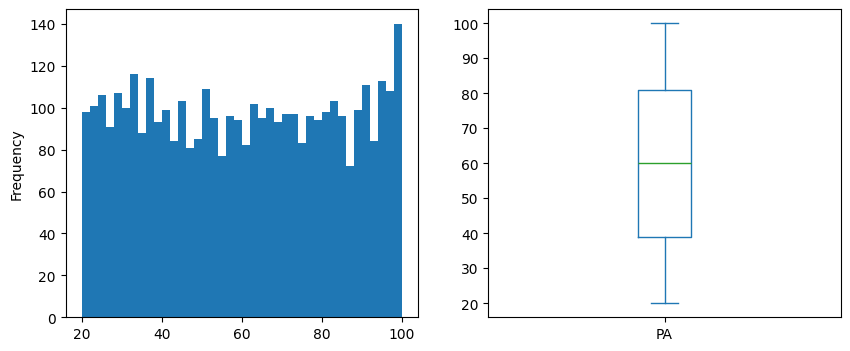

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

no_outliers_belanja['PA'].plot(kind='hist', bins=40, ax=ax[0])
no_outliers_belanja['PA'].plot(kind='box', ax=ax[1])

plt.show()

In [29]:
# Perhitungan outlier untuk kolom previous purchases
# Menentukan kuartil pertama 1 dan 3 dari previous purchases
Q1_sebelum = df['PP'].quantile(0.25)
Q3_sebelum = df['PP'].quantile(0.75)

# Hitung IQR
IQR_sebelum = Q3_sebelum - Q1_sebelum

# Tentukan batas outlier
lower_bound_sebelum = Q1_belanja - 1.5 * IQR_sebelum
upper_bound_sebelum = Q3_belanja + 1.5 * IQR_sebelum

# Identifikasi outlier
outliers_sebelum = df[(df['PP'] < lower_bound_sebelum) | (df['PP'] > upper_bound_sebelum)]
no_outliers_sebelum = df[(df['PP'] >= lower_bound_sebelum) & (df['PP'] <= upper_bound_sebelum)]

# Persentase outlier
percent_outliers_sebelum = (len(outliers_sebelum) / len(df)) * 100
print(f"Persentase outlier: {percent_outliers_sebelum:.2f}%")

Persentase outlier: 2.13%


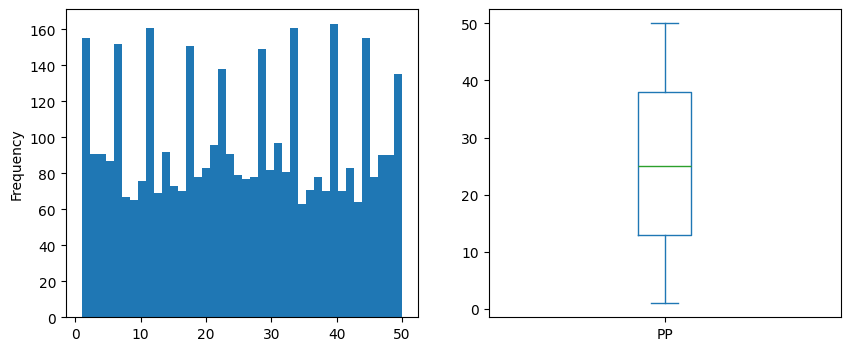

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

no_outliers_belanja['PP'].plot(kind='hist', bins=40, ax=ax[0])
no_outliers_belanja['PP'].plot(kind='box', ax=ax[1])

plt.show()

In [31]:
# Perhitungan outlier untuk kolom review rating
# Menentukan kuartil pertama 1 dan 3 dari review rating
Q1_rating = df['RR'].quantile(0.25)
Q3_rating = df['RR'].quantile(0.75)

# Hitung IQR
IQR_rating = Q3_rating - Q1_rating

# Tentukan batas outlier
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Identifikasi outlier
outliers_rating = df[(df['RR'] < lower_bound_rating) | (df['RR'] > upper_bound_rating)]
no_outliers_rating = df[(df['RR'] >= lower_bound_rating) & (df['RR'] <= upper_bound_rating)]

# Persentase outlier
percent_outliers_rating = (len(outliers_rating) / len(df)) * 100
print(f"Persentase outlier: {percent_outliers_rating:.2f}%")

Persentase outlier: 0.00%


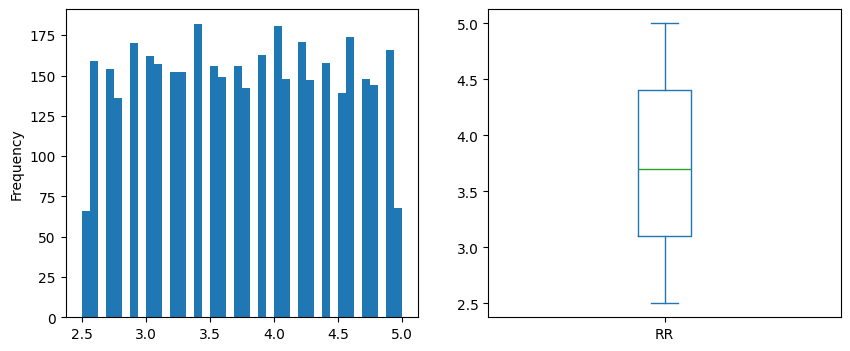

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

no_outliers_belanja['RR'].plot(kind='hist', bins=40, ax=ax[0])
no_outliers_belanja['RR'].plot(kind='box', ax=ax[1])

plt.show()

Insight:

Dari hasil perhitungan dan hasil visualisasi diatas, data kolom Purchase Amount atau kolom besar jumlah transaksi, kolom previous purchases dan kolom review rating adalah kolom yang bersih tanpa outlier dengan nilai yang signifikan perbedaannya.
___

### 5.12 Bagaimana hubungan dari keseluruhan variabel data?

User ingin mengetahui apakah terdapat hubungan dari masing-masing variabel atau kolom. Apakah memiliki impact atau tidak, sehingga ini perlu untuk dihitung atau divisualisasikan dengan baik. Saya juga perlu untuk membuat hipotesis dalam menjawab pertanyaan ini.

Membuat Hipotesis:

* Hipotesis Null atau Nol (H0):

    Tidak terdapat hubungan yang signifikan antar variabel atau kolom.

* Hipotesis Satu (H1):

    Ada hubungan yang signifikan antar variabel atau kolom.

Karena dataset yang digunakan distribusi atau persebarannya tidak normal, maka saya menggunakan metode Spearman untuk menghitung p-value dan besar korelasi antar variabel atau kolomnya.

In [33]:
# Perhitungan nilai pvalue korelasi antar kolom numerik (Purchase Amout dan Review Rating)
corr_rho, pval_s = stats.spearmanr(df['PA'], df['RR'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.03, p-value: 0.05782360378309655


Insight:

Karena nilai p-value lebih besar dari 0.05, maka terima H0, yaitu tidak ada hubungan antara kolom besar jumlah transaksi dengan kolom review rating.
___

In [34]:
# Perhitungan nilai pvalue korelasi antar kolom numerik (Purchase Amout dan Previous Purchases)
corr_rho, pval_s = stats.spearmanr(df['PA'], df['PP'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.01, p-value: 0.6036830945527644


Insight:

Karena nilai p-value lebih besar dari 0.05, maka terima H0, yaitu tidak ada hubungan antara kolom besar jumlah transaksi dengan kolom previous purchases.
___

In [35]:
# Perhitungan nilai pvalue korelasi antar kolom numerik (Purchase Amout dan Umur konsumen)
corr_rho, pval_s = stats.spearmanr(df['PA'], df['Age'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.01, p-value: 0.5143568334160391


Insight:

Karena nilai p-value lebih besar dari 0.05, maka terima H0, yaitu tidak ada hubungan antara kolom besar jumlah transaksi dengan kolom umur konsumen.
___

Tidak ada hubungan antar masing-masing kolom numerik, namun saya ingin menampilkan matriks korelasi dari semua kolom numerik tersebut.

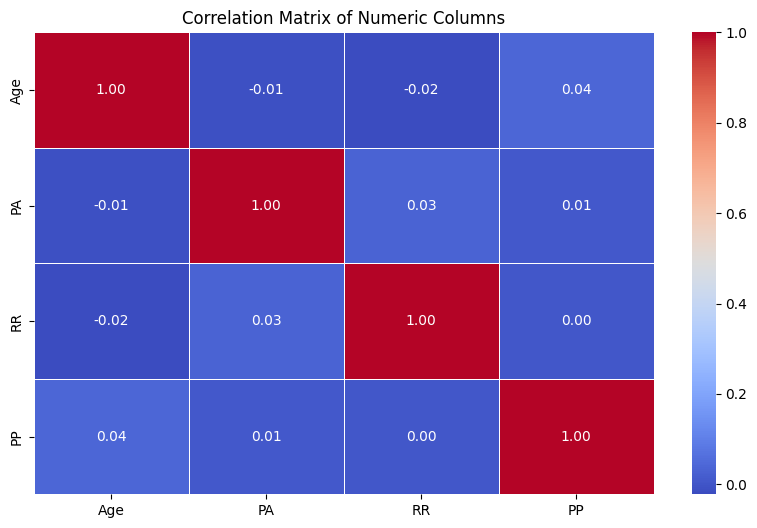

In [36]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr(method="pearson")  # Menghitung korelasi Pearson

# Menampilkan correlation matrix dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


Dari perhitungan nilai korelasi antar kolom numerik, terlihat bahwa tidak ada hubungan yang kuat antara setiap kolom numerik. Ini berarti setiap kolom bersifat independent yang tidak dipengaruhi oleh kolom lainnya.
___

Saatnya menganalisis hubungan antara variabel kategorikal! Berikut adalah hasil perhitungan yang menunjukkan variabel kategorikal dengan tingkat keterkaitan yang tinggi.

In [37]:
# Pembuatan tabel kontingensi dari kolom Gender dengan Shipping Type
contingency_table_gender_ST = pd.crosstab(df['Gender'], df['Shipping Type'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_ST)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 12.243
P-value: 0.032


Dengan nilai Chi-Square = 12.243 dan p-value = 0.032, berarti terima H1, yaitu ada hubungan yang kuat antara variabel atau kolom "Gender" dengan kolom "Shipping Type".

Saya akan menampilkan nilai kedalaman korelasinya dengan menggunakan perhitungan Cramer's V.

In [38]:
# Menghitung Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Contingency table dari sebelumnya
cramers_v_value = cramers_v(contingency_table_gender_ST)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.056


Dengan nilai Cramér's V sebesar 0.056, maka kedalaman hubungan antara variabel ini sangat lemah.
___

In [39]:
# Pembuatan tabel kontingensi dari kolom Gender dengan Shipping Type
contingency_table_gender_SS = pd.crosstab(df['Gender'], df['SS'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_SS)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 676.794
P-value: 0.000


Dengan nilai Chi-Square = 676.794 dan p-value dibawah 0.05, berarti terima H1, yaitu ada hubungan yang kuat antara variabel atau kolom "Gender" dengan kolom "Subscription Status".

Saya akan menampilkan nilai kedalaman korelasinya dengan menggunakan perhitungan Cramer's V dan visualisasi korelasinya dengan heatmap dibawah ini.

In [40]:
# Menghitung Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Contingency table dari sebelumnya
cramers_v_value = cramers_v(contingency_table_gender_SS)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.417


Dengan nilai Cramér's V sebesar 0.417, kedalaman hubungan antara kedua variabel "Gender" dan "Subscription Status" termasuk dalam kategori sedang.

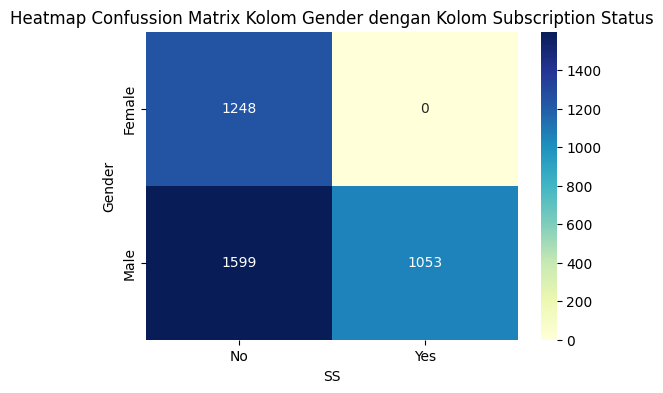

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table_gender_SS, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap Confussion Matrix Kolom Gender dengan Kolom Subscription Status")
plt.xlabel("SS")
plt.ylabel("Gender")
plt.show()

Insight:

- Tidak ada gender "Female" yang berlangganan membership (Gender = Female & SS = Yes), frekuensi = 0

- Gender "Male" yang berlangganan membership (Gender = Male & SS = Yes), frekuensi = 1.053

- Gender "Female" yang tidak berlangganan membership (Gender = Female & SS = No), frekuensi = 1.248

- Gender "Male" yang tidak berlangganan membership (Gender = Male & SS = No), frekuensi = 1.599

Dari insight ini, dapat ditarik kesimpulan bahwa fitur dari berlangganan membership belum menarik perhatian gender "Female", sehingga perusahaan perlu untuk membuat fitur membership menjadi lebih menarik atau menambahkan fitur yang disukai oleh gender "Female".
___

In [42]:
# Pembuatan tabel kontingensi dari kolom Gender dengan DA
contingency_table_gender_da = pd.crosstab(df['Gender'], df['DA'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_da)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 1381.941
P-value: 0.000


Dengan nilai Chi-Square = 1381.941 dan p-value dibawah 0.05, berarti terima H1, yaitu ada hubungan antara variabel atau kolom "Gender" dengan kolom "Discount Applied".

Saya akan menampilkan nilai kedalaman korelasinya dengan menggunakan perhitungan Cramer's V dan visualisasi korelasinya dengan heatmap dibawah ini.

In [43]:
# Menghitung Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Contingency table dari sebelumnya
cramers_v_value = cramers_v(contingency_table_gender_da)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.595


Dengan nilai Cramér's V sebesar 0.595, kedalaman hubungan antara kedua variabel "Gender" dan "Subscription Status" termasuk dalam kategori sedang menuju kuat.

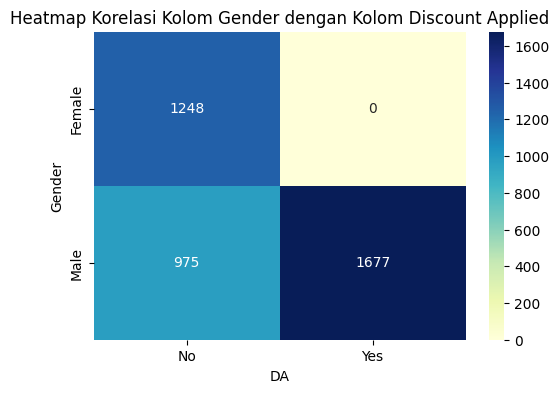

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table_gender_da, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap Korelasi Kolom Gender dengan Kolom Discount Applied")
plt.xlabel("DA")
plt.ylabel("Gender")
plt.show()

Insight:

- Tidak ada gender "Female" yang menggunakan diskon (Gender = Female & DA = Yes), frekuensi = 0.

- Gender "Male" yang menggunakan diskon (Gender = Male & DA = Yes), frekuensi = 1.677.

- Gender "Female" yang tidak menggunakan diskon (Gender = Female & DA = No), frekuensi = 1.248.

- Gender "Male" yang tidak menggunakan diskon (Gender = Male & DA = No), frekuensi = 975.

Dari insight ini, dapat ditarik kesimpulan bahwa tidak ada gender "Female" yang mengajukan atau menggunakan diskon, akan tetapi terdapat gender "Male" yang mengajukan atau menggunakan diskon, sehingga fitur potongan harga ini perlu untuk dipertahankan keberadaannya.
___

In [45]:
# Pembuatan tabel kontingensi dari kolom discount applied dengan subscription status
contingency_table = pd.crosstab(df['DA'], df['SS'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 1908.921
P-value: 0.000


Nilai p-value dibawah 0.05, yang berarti adalah terima H1 atau terdapat hubungan dari variabel atau kolom "Discount Applied" dengan "Subscription Status". Saya akan menampilkan nilai kedalaman korelasinya dengan menggunakan perhitungan Cramer's V dan visualisasi korelasinya dengan heatmap dibawah ini.

In [46]:
# Menghitung Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Contingency table dari sebelumnya
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.700


Dengan nilai Cramér's V sebesar 0.7, maka hubungan antara variabel "Discount Applied" dengan variabel "Subscription Status" cukup erat, yang berkorelasi secara positif, sehingga dapat diambil kesimpulan bahwa konsumen yang berlangganan membership, akan menggunakan diskon, dan sebaliknya, konsumen yang menggunakan diskon adalah konsumen yang berlangganan membership toko. 

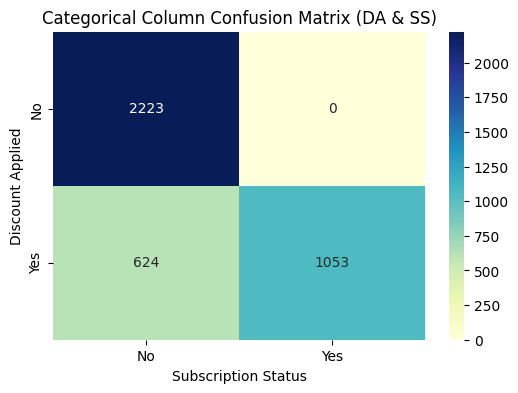

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Categorical Column Confusion Matrix (DA & SS)")
plt.xlabel("Subscription Status")
plt.ylabel("Discount Applied")
plt.show()


**Insight:**

- Konsumen tidak mengajukan diskon dan konsumen tidak memiliki membership (DA = No & SS = No), frekuensi = 2223.

- Konsumen tidak mengajukan diskon, dan konsumen berlangganan membership (DA = No & SS = Yes), frekuensi = 0.

- Konsumen mengajukan diskon dan konsumen tersebut berlangganan membership (DA = Yes & SS = Yes), frekuensi = 1053.

- Konsumen mengajukan diskon dan konsumen tersebut berlangganan membership (DA = Yes & SS = No), frekuensi = 624.

Seluruh pelanggan yang berlangganan membership (Subscription Status = Yes) menggunakan diskon (Discount Applied = Yes), sebagaimana ditunjukkan dengan tidak adanya pelanggan dalam kategori “Tidak Menggunakan Diskon + Membership.” Hal ini secara kuat menunjukkan bahwa fitur diskon memiliki keterkaitan yang erat dengan penggunaan membership. 

Selain itu, meskipun sebagian besar pelanggan non-member juga memanfaatkan diskon (624 dari 2.847 pelanggan non-member), manfaat diskon tampaknya sangat menarik terutama bagi pelanggan yang telah berlangganan.

Pola ini mengindikasikan bahwa fitur diskon bisa menjadi pendorong utama untuk meningkatkan jumlah pelanggan yang berlangganan, atau menjadi insentif eksklusif yang melekat pada pengalaman membership. Untuk memaksimalkan potensi ini, perusahaan dapat memperkuat promosi manfaat diskon dalam program membership, atau bahkan menguji kampanye “diskon khusus untuk member” guna meningkatkan keterlibatan pelanggan dan tingkat langganan.



___

## 6. Conclusion

### 6.1 Conclusion

Setelah menganalisis data ini, maka terdapat beberapa kesimpulan yang dibuat. 

Terdapat beberapa aspek yang dapat dipertimbangkan oleh perusahaan untuk dapat menarik perhatian konsumen, yaitu:

1. Jenis dan Merk Barang yang Dijual

    Perusahaan perlu mempertimbangkan tentang tren dari merk serta minat dari para konsumen tentang barang yang dijual. Dengan mengikuti perkembangan jaman serta minat yang besar dari konsumen, maka perusahaan dapat menarik perhatian belanja dari konsumen, serta menciptakan konsumen yang baru di waktu yang sama.

2. Fitur Berlangganan Membership

    Perusahaan perlu untuk mempertimbangkan dan menambahkan fitur yang akan didapatkan seorang konsumen yang berlangganan membership toko, sehingga jika konsumen beranggapan bahwa fitur yang dimiliki adalah "menguntungkan", tentu saja untuk kedua belah pihak, maka konsumen cenderung akan melakukan transaksi / berbelanja. Fitur berlangganan yang lebih "menarik" juga akan menciptakan konsumen baru bagi perusahaan.

3. Mempertahankan Fitur Diskon Belanja

    Perusahaan perlu untuk tetap mempertahankan fitur diskon ini, karena banyak konsumen yang akan merasa "terbantu" dengan adanya fitur potongan harga. Perusahaan juga dapat menambahkan besar potongan harga jika jumlah transaksi meningkat, sehingga konsumen cenderung akan bertransaksi dengan jumlah yang lebih banyak.

4. Pertimbangan "Event" Sesuai Musim

    Event yang menarik dan sesuai di musim yang berbeda-beda juga akan menarik perhatian dari konsumen tetap / konsumen baru, sehingga jumlah transaksi akan meningkat. 

5. Perbaikan Kualitas Pelayanan dan Barang Yang Dijual

    Dari rata-rata perhitungan hasil review, rata-rata yang didapatkan adalah 3.75. Ini adalah nilai yang rendah karena konsumen cenderung merasa "biasa" saja dengan kualitas pelayanan dan barang yang dijual, sehingga perlu dilaksanakan pelatihan kepada para karyawan untuk memperbaiki sifat yang dimiliki. Selain itu, perusahaan juga perlu memperhatikan kualitas barang yang dijual, sehingga konsumen dapat merasa puas dan nilai rating dapat meningkat.
___
